# IA Heart Disease Dataset from UCI


In [14]:
!pip install pydotplus
!pip install graphviz
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install numpy

link al conjunto de datos https://www.kaggle.com/ronitf/heart-disease-uci 

## Información provista sobre el conjunto de datos

Citado de el link provisto por el profesor

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Complete attribute documentation:

1.  age: age in years 
2.  sex: sex (1 = male; 0 = female) 
3.  cp: chest pain type <br>
    -- Value 1: typical angina<br>
    -- Value 2: atypical angina<br>
    -- Value 3: non-anginal pain<br>
    -- Value 4: asymptomatic<br>
4.  trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5.  chol: serum cholestoral in mg/dl Y
6.  fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7.  restecg: resting electrocardiographic results<br>
    -- Value 0: normal<br>
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8.  thalach: maximum heart rate achieved
9.  exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment<br>
    -- Value 1: upsloping<br>
    -- Value 2: flat<br>
    -- Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 
    -- 3 = normal
    -- 6 = fixed defect
    -- 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing (in any major vessel: attributes

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import argparse
import glob
from pandas import DataFrame
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#Necesario para graficar el arbol de decision
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

importando los datos

In [16]:
dataset=pd.read_csv("heart.csv")

In [17]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Graficaremos las variables numericas y categorias

## Variables Categoricas

Las variables categóricas también se denominan variables cualitativas o variables de atributos. Los valores de una variable categórica son categorías o grupos mutuamente excluyentes. Los datos categóricos pueden tener o no tener un orden lógico. 

## Variables numericas

Las variables numericas

## Clasificando las variables

Dadas las descripciones dadas de los datos del dataset y la definición de lo que es una variable categorica podemos decir que los siguientes atributos son de tipo categorico
- sex
- cp
- fbs
- restecg 
- exang
- slope
- thal
<br>y los siguientes son de tipo numerico
- age
- trestbps
- chol
- thalach 	
- oldpeak
- ca

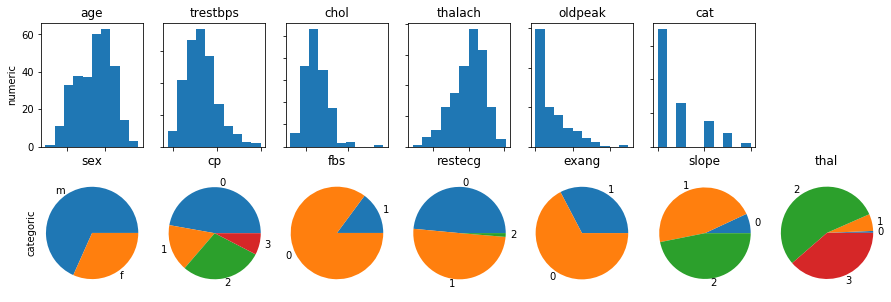

In [18]:
fig, axs = plt.subplots(2, 7, figsize = (15,5))

#numeric

#age
axs[0, 0].hist(dataset.age)
axs[0, 0].set_title('age')
#trestbps
axs[0, 1].hist(dataset.trestbps)
axs[0, 1].set_title('trestbps')
#chol
axs[0, 2].hist(dataset.chol)
axs[0, 2].set_title('chol')
#thalach
axs[0, 3].hist(dataset.thalach)
axs[0, 3].set_title('thalach')
#oldpeak
axs[0, 4].hist(dataset.oldpeak)
axs[0, 4].set_title('oldpeak')
#cat
axs[0, 5].hist(dataset.ca)
axs[0, 5].set_title('cat')

#categoric

#sex
datasex = [dataset.sex.sum(), dataset.sex.shape[0] - dataset.sex.sum()]

axs[1, 0].pie(datasex, labels = ['m','f'])
axs[1, 0].axis('equal')
axs[1, 0].set_title('sex')

#cp
datacp = []
datacp.append((dataset['cp'] == 0).sum())
datacp.append((dataset['cp'] == 1).sum())
datacp.append((dataset['cp'] == 2).sum())
datacp.append((dataset['cp'] == 3).sum())

axs[1, 1].pie(datacp, labels =['0','1','2','3'])
axs[1, 1].axis('equal')
axs[1, 1].set_title('cp')

#fbs
datafbs = [dataset.fbs.sum(), dataset.fbs.shape[0] - dataset.fbs.sum()]

axs[1, 2].pie(datafbs, labels = ['1', '0'])
axs[1, 2].axis('equal')
axs[1, 2].set_title('fbs')

#restecg
datarestecg = []
datarestecg.append((dataset['restecg'] == 0).sum())
datarestecg.append((dataset['restecg'] == 1).sum())
datarestecg.append((dataset['restecg'] == 2).sum())

axs[1, 3].pie(datarestecg, labels = ['0', '1', '2'])
axs[1, 3].axis('equal')
axs[1, 3].set_title('restecg')

#exang
dataexang = [dataset.exang.sum(), dataset.exang.shape[0] - dataset.exang.sum()]

axs[1, 4].pie(dataexang, labels = ['1','0'])
axs[1, 4].axis('equal')
axs[1, 4].set_title('exang')

#slope
dataslope = []
dataslope.append((dataset['slope'] == 0).sum())
dataslope.append((dataset['slope'] == 1).sum())
dataslope.append((dataset['slope'] == 2).sum())

axs[1, 5].pie(dataslope, labels=['0','1','2'])
axs[1, 5].axis('equal')
axs[1, 5].set_title('slope')

#thal 
datathal = []
datathal.append((dataset['thal'] == 0).sum())
datathal.append((dataset['thal'] == 1).sum())
datathal.append((dataset['thal'] == 2).sum())
datathal.append((dataset['thal'] == 3).sum())

axs[1, 6].pie(datathal, labels = ['0','1','2','3'])
axs[1, 6].axis('equal')
axs[1, 6].set_title('thal')


y = ['numeric','categoric']
i = 0
for ax in axs.flat:
    if (i < 6):
        ax.set(xlabel = '', ylabel=y[0])
    else:
        ax.set(xlabel = '', ylabel=y[1])
    i += 1

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.delaxes(axs.flatten()[6])

##  Elementos faltantes

Vemos si hay 

## Partimos los datos en entrenamiento y test
80% para entrenamiento y 20% para test

In [19]:
columnsTitles = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
features = dataset[columnsTitles].values
target = dataset["target"].values

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print("Conjunto de entrenamiento: ")
print("cantidad de registros: ", trainX.shape[0])
print("cantidad de columnas: ", trainX.shape[1])
print("cantidad de registro target: ", trainY.shape[0])
print("\nConjunto de prueba: ")
print("cantidad de registros: ", testX.shape[0])
print("cantidad de columnas: ", testX.shape[1])
print("cantidad de registros target: ", testY.shape[0])


Conjunto de entrenamiento: 
cantidad de registros:  242
cantidad de columnas:  13
cantidad de registro target:  242

Conjunto de prueba: 
cantidad de registros:  61
cantidad de columnas:  13
cantidad de registros target:  61


## Arbol de decision y matriz de confusión

entrenamos el arbol de decisión.

In [23]:
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
modelDesicionTree = tree.DecisionTreeClassifier(max_depth=10, min_samples_split = 5, random_state = 1)
modelDesicionTree = modelDesicionTree.fit(trainX, trainY)

#Print the score on the train data
print("training set: ", modelDesicionTree.score(trainX, trainY)*100, "%")
#Print the score on the test data
print("test set: ", modelDesicionTree.score(testX, testY)*100, "%")

matrixDecisionTree = confusion_matrix(modelDesicionTree.predict(testX), testY)

print("confusion matrix: ")
print(matrixDecisionTree)
#graph of the confusion matrix
x = [matrixDecisionTree[0][0], matrixDecisionTree[0][1]]
y = [matrixDecisionTree[1][0], matrixDecisionTree[1][1]]

training = plt.bar(_X-0.1,x, width=0.2, align='center')
test = plt.bar(_X+0.1,y, width=0.2,  align='center')
plt.xticks(np.arange(2), ['enfermos','no enfermos'])

def autolabel(rects, bars):
    for rect,bar in zip(rects,bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.1, bar,ha='center', va='bottom')

autolabel(training,["bien","mal"])
autolabel(test,["mal", "bien"])

plt.title('Matriz de Confusión')

training set:  95.86776859504133 %
test set:  65.57377049180327 %
confusion matrix: 
[[16 14]
 [ 7 24]]


NameError: name '_X' is not defined

## Graficamos el arbol de decision

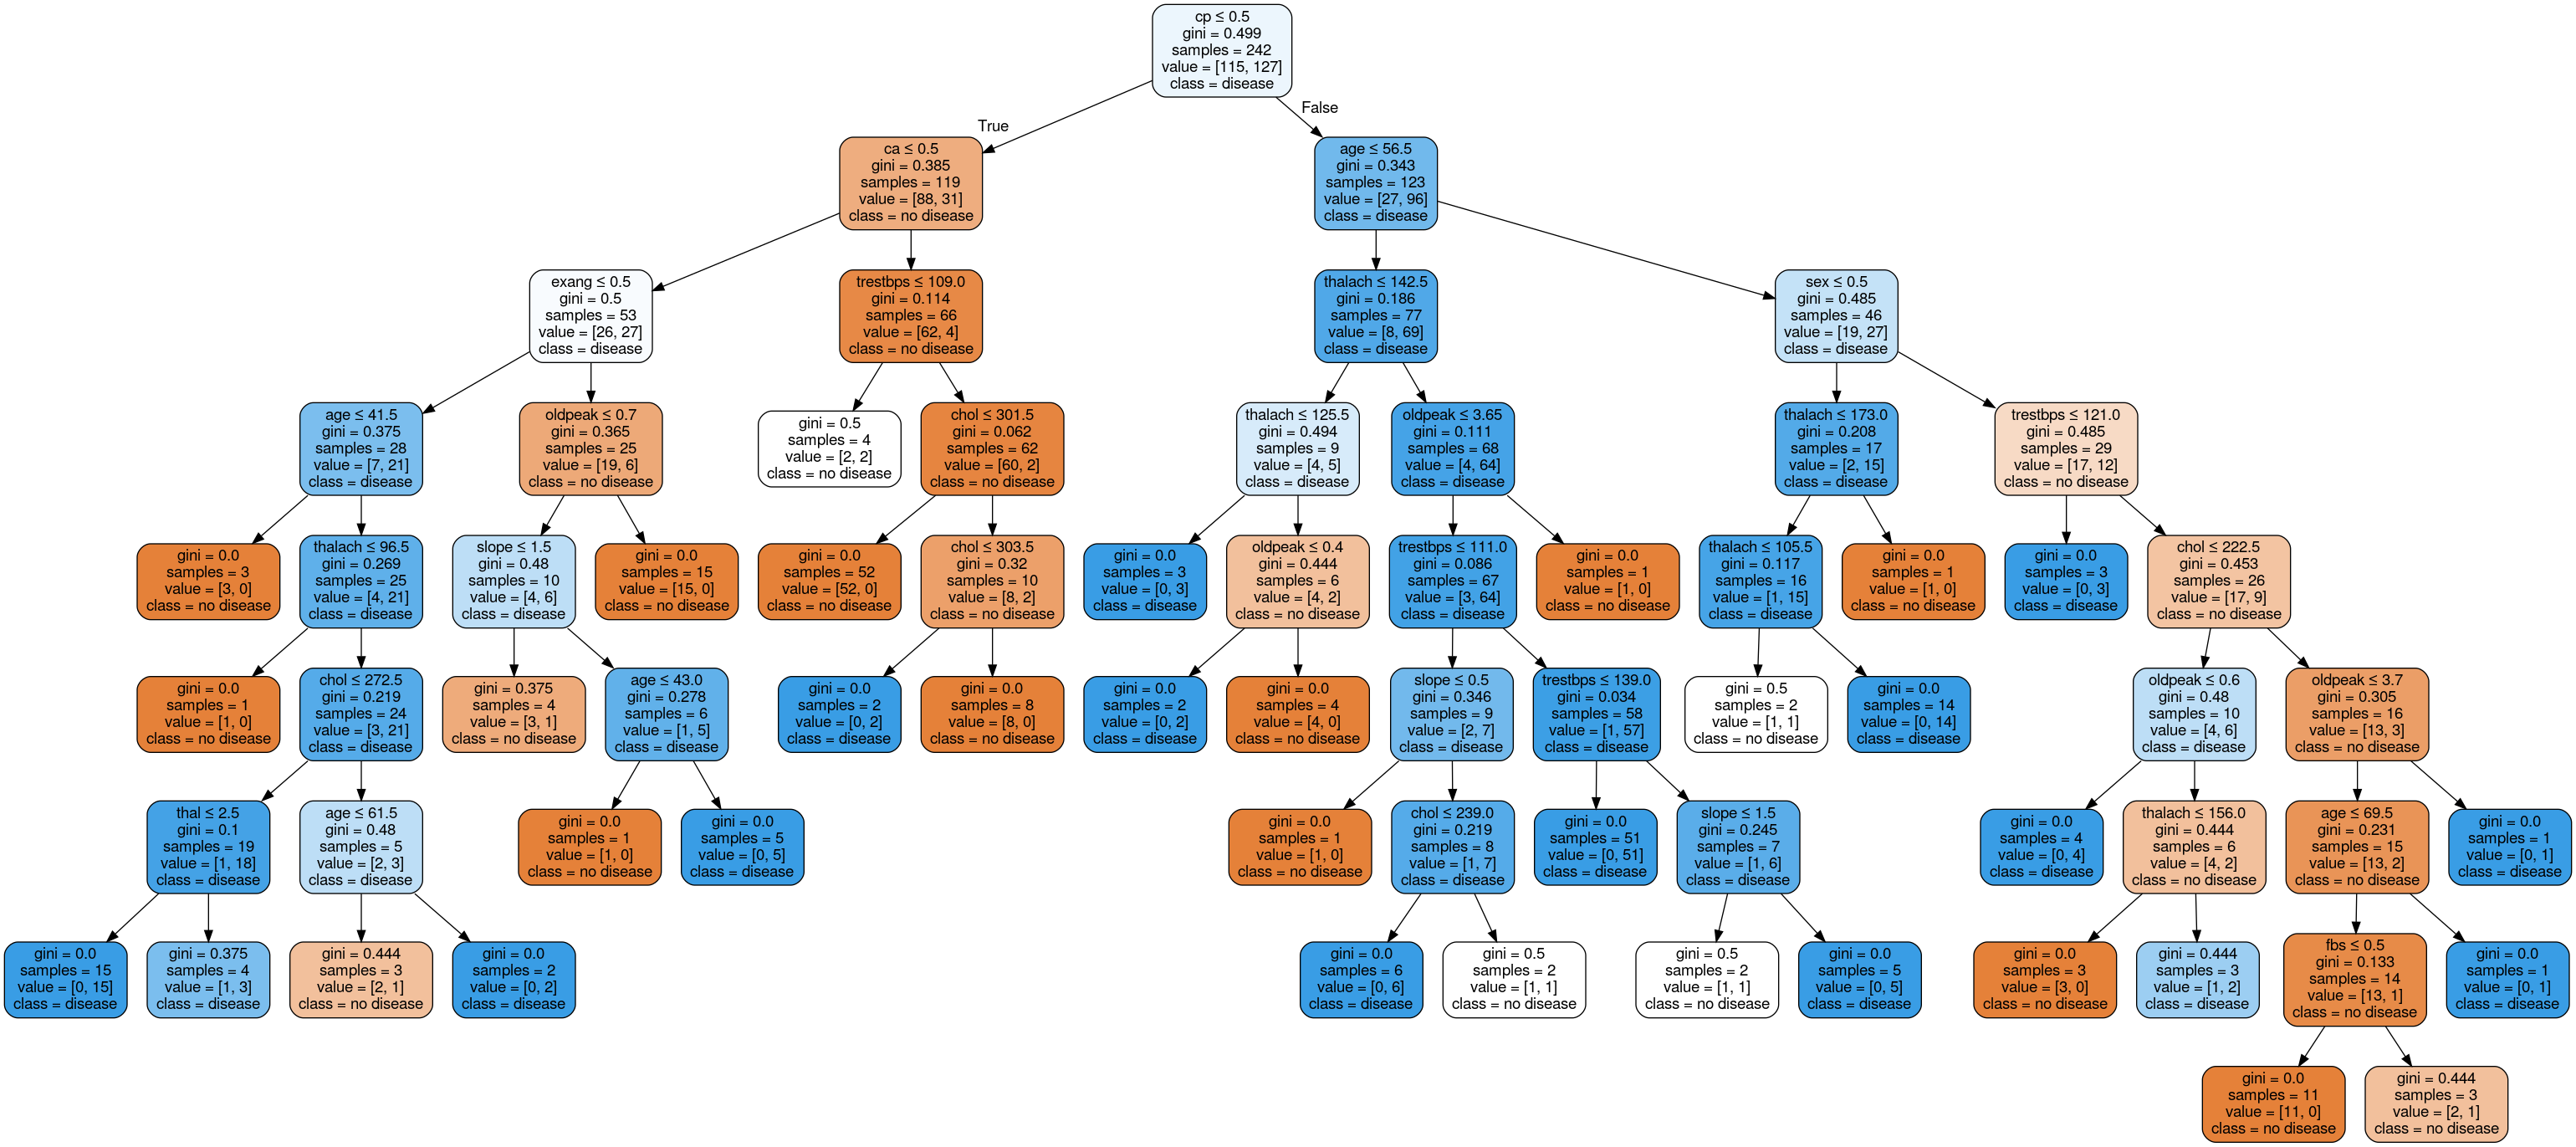

In [24]:
dot_data = StringIO()
export_graphviz(modelDesicionTree, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                feature_names = list(dataset.columns[:13]),
                class_names = ['no disease','disease'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Interpretación del modelo obtenido

## Entendiendo los contenidos de los nodos
Para poder comprender nuestro arbol de decision, debemos analizar detalladamente los elementos presentes en cada nodo

### comparacion (Feature):
En el primer elemento de arriba a abajo de cada nodo, se encuentra una operacion logica donde se evalua el valor de algun feature en especifico. Esta comparacion es basicamente una pregunta que se realiza a cada muestra (sample) presente en el nodo, cuando un sample cumple con la condicion dada este es enviado al nodo hijo izquierdo, en caso contrario es enviado al nodo hijo derecho

### gini
El coeficiente de gini es una metrica que cuantifica la pureza de un nodo/hoja. Una coeficiente de gini mayor que cero implica que hay muestras contenidas en el nodo que pertenencen a clases diferentes. Un coeficiente de gini igual a cero significa que el nodo es puro, esto es que en un nodo existen muestras de una sola clase.

### samples
Este valor es solo una suma de todas las muestras de cada clase contenidas en el nodo

### values
Values es una lista que indica cuantas muestras en un nodo dado caen en cada categoria. En nuestro caso tenemos en la posicion 0 la categoria 'no disease/no enfermo' y en la 1 la categoria 'disease/enfermo'

## Divisiones del arbol

Para determinar que feature usar para realizar la primer division (crear el nodo raiz) el algoritmo toma un feature y lo divide. Luego mira los subconjuntos y mide su impureza usando el coeficiente de gini. Esto es realizado para diferentes umbrales y luego determina que la mejor division para un feature dado es aquel que produce los subconjuntos mas puros. Este proceso es repetido para todos los features en el conjunto de entrenamiento. Por ultimo, el nodo raiz es determinado por el feature que produce una division con los subconjuntos mas puros. Una vez que el nodo raiz es decidido, el arbol crece a una profundid de uno. Este proceso es repetido para los otros nodos en el arbol.

## Modelo de Ingenuo de Bayes

Entrenamos modelo de bayes ingenuo


training set:  84.71074380165288 %
test set:  81.9672131147541 %
confusion matrix: 
[[24  6]
 [ 5 26]]


Text(0.5, 1.0, 'Matriz de Confusión')

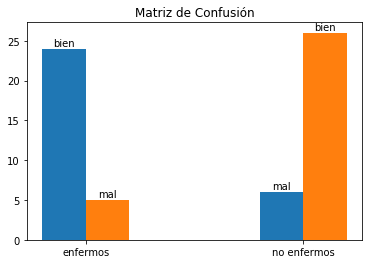

In [140]:
gnb = GaussianNB()

gaussianModel = gnb.fit(trainX, trainY)

#Print the score on the train data
print("training set: ", gaussianModel.score(trainX, trainY) * 100, "%")
#Print the score on the test data
print("test set: ", gaussianModel.score(testX, testY)*100, "%")

matrixGaussian = confusion_matrix(gaussianModel.predict(testX), testY)

print("confusion matrix: ")
print(matrixGaussian)

x = [matrixGaussian[0][0], matrixGaussian[0][1]]
y = [matrixGaussian[1][0], matrixGaussian[1][1]]

training = plt.bar(_X-0.1,x, width=0.2, align='center')
test = plt.bar(_X+0.1,y, width=0.2,  align='center')
plt.xticks(np.arange(2), ['enfermos','no enfermos'])

def autolabel(rects, bars):
    for rect,bar in zip(rects,bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.1, bar,ha='center', va='bottom')

autolabel(training,["bien","mal"])
autolabel(test,["mal", "bien"])

plt.title('Matriz de Confusión')

## Interpretación del modelo Ingenuo de Bayes

## Red Neuronal

On training:  82.64462809917356 %

On test:  80.32786885245902 %
confusion matrix: 
[[26  9]
 [ 3 23]]


Text(0.5, 1.0, 'Matriz de Confusión')

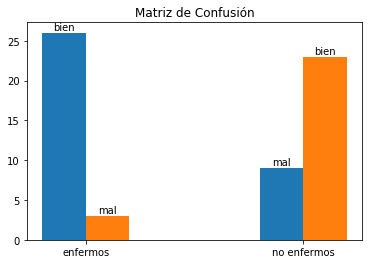

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

modelNeuralNetwork = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (12,10,8,6,4,2), random_state=1, verbose = True)

modelNeuralNetwork.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training: ", modelNeuralNetwork.score(trainXX, trainY)*100, "%")
#matrix = confusion_matrix(model3.predict(trainXX), trainY)

#Print the score on the test data
print("\nOn test: ", modelNeuralNetwork.score(testXX, testY)*100, "%")

matrixNeuralNetwork = confusion_matrix(modelNeuralNetwork.predict(testXX), testY)

print("confusion matrix: ")
print(matrixNeuralNetwork)

x = [matrixNeuralNetwork[0][0], matrixNeuralNetwork[0][1]]
y = [matrixNeuralNetwork[1][0], matrixNeuralNetwork[1][1]]

training = plt.bar(_X-0.1,x, width=0.2, align='center')
test = plt.bar(_X+0.1,y, width=0.2,  align='center')
plt.xticks(np.arange(2), ['enfermos','no enfermos'])

def autolabel(rects, bars):
    for rect,bar in zip(rects,bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.1, bar,ha='center', va='bottom')

autolabel(training,["bien","mal"])
autolabel(test,["mal", "bien"])

plt.title('Matriz de Confusión')


## Interpretación del modelo de Redes Neuronales

## Comparación de los 3 modelos

Compare los resultados de los 3 modelos usados en términos de la precisión, la estabilidad y la interpretabilidad de los resultados.

## Precisión

 cuando predice positivo, porcentaje clasificado correctamente 

## Estabilidad 



## Interpretabilidad



## Cosas que he encontrado de kernels 

- resting_blood_pressure is a strong factor but only in early age ishivinal kenerl top risk factors for heart diseasee
<br>
- dummy values created for categorical variables in the one i send myself to facebook, and de gaussian model was better with that<br>

- the confussion matrix mean:<br>
    matrix[0][0] -> true negative<br>
    matrix[0][1] -> false positive<br>
    matrix[1][0] -> false negative<br>
    matrix[1][1] -> true positive<br>